In [11]:
from scipy.stats import binom
import numpy as np
import matplotlib.pyplot as plt

In [6]:
binom_h0 = binom(n=30, p=0.5)
binom_h0.rvs(1) #возвращает какую-то одну реализацию случайной величины

array([19])

In [8]:
binom_h0.pmf(20)

np.float64(0.027981600724160654)

In [10]:
x_grid = np.arange(1, 31)
probs = binom_h0.pmf(x_grid)

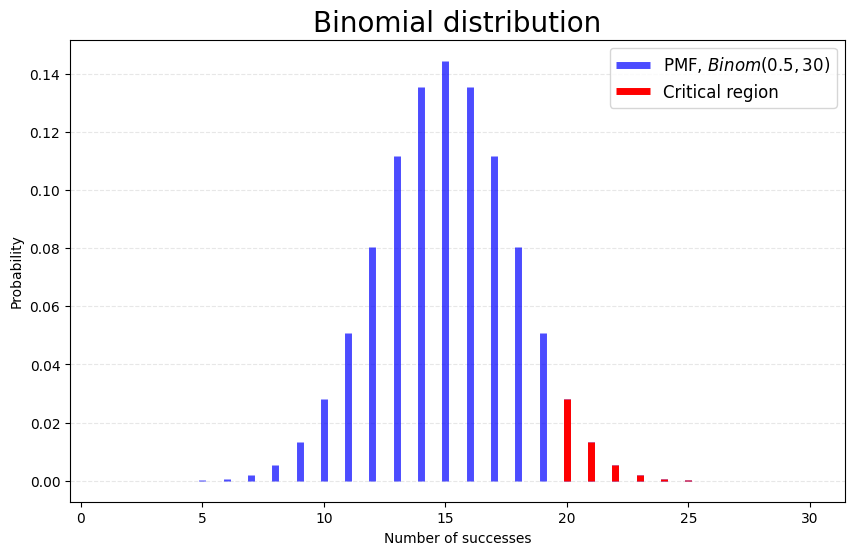

In [18]:
plt.figure(figsize=(10, 6)) # Сделал чуть больше для наглядности

plt.vlines(x_grid, 0, probs, linewidth=5.0, color='blue', alpha=0.7, label='PMF, $Binom(0.5, 30)$')

crit_reg = x_grid >= 20
plt.vlines(x_grid[crit_reg], 0, probs[crit_reg], linewidth=5.0, color='red', label='Critical region')

plt.title('Binomial distribution', fontsize=20)
plt.ylabel('Probability')
plt.xlabel('Number of successes')
plt.legend(fontsize=12) 
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.show()

In [19]:
np.sum(probs[crit_reg])

np.float64(0.04936857335269451)

In [20]:
crit_reg = x_grid >= 19
np.sum(probs[crit_reg])

np.float64(0.10024421103298661)

In [21]:
binom_h0.cdf(19)

np.float64(0.9506314266473055)

In [22]:
1 - binom_h0.cdf(19)

np.float64(0.04936857335269451)

In [23]:
binom_h0.ppf(0.95)

np.float64(19.0)

In [28]:
def make_binom_criterion(n, mu=0.5, alpha=0.05):
    "Строит критерий для задачи с доставкой"

    binom_ho = binom(n, mu)
    q = binom_ho.ppf(1-alpha)
    return q +1

make_binom_criterion(30)

np.float64(20.0)

In [33]:
def pvalue_binom(n, mu, q):
    "Расчет pvalue для задачи с доставкой"

    binom_h0 = binom(n, mu)
    return 1 - binom_h0.cdf(q -1)

pvalue_binom(30, 0.5, 19)

np.float64(0.10024421103298664)

## Двухсторонний критерий

In [34]:
binom_h0_nonsym =  binom(30, p=0.8)

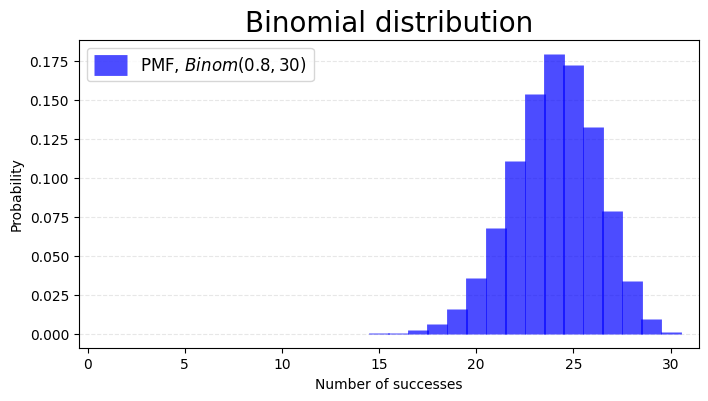

In [40]:
plt.figure(figsize=(8,4))

probs = binom_h0_nonsym.pmf(x_grid)
plt.vlines(x_grid, 0, probs, linewidth=15.0, color='blue', alpha=0.7, label='PMF, $Binom(0.8, 30)$')

plt.title('Binomial distribution', fontsize=20)
plt.ylabel('Probability')
plt.xlabel('Number of successes')
plt.legend(fontsize=12, loc='upper left') 
plt.grid(axis='y', linestyle='--', alpha=0.3)

plt.show()

In [43]:
def two_sided_criterion_nonsym(n, mu, alpha):

    binom_h0 = binom(n, mu)

    c2 = binom_h0.ppf(1 - alpha/2) + 1
    c1 = binom_h0.ppf(alpha/2) - 1

    return c1, c2

In [45]:
c1, c2 = two_sided_criterion_nonsym(30, 0.8, 0.05)
c1,c2

(np.float64(18.0), np.float64(29.0))

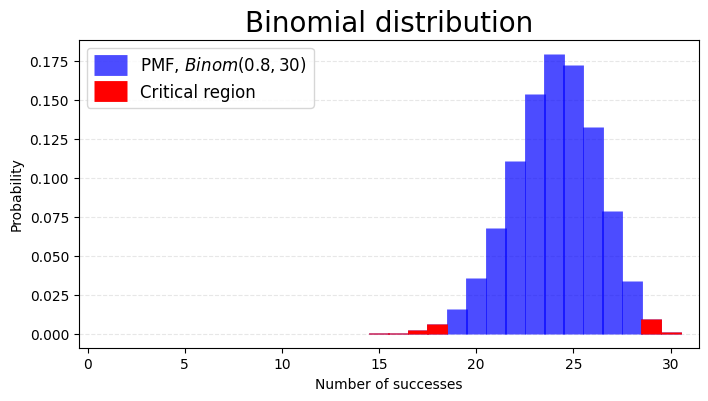

In [48]:
plt.figure(figsize=(8,4))

probs = binom_h0_nonsym.pmf(x_grid)
plt.vlines(x_grid, 0, probs, linewidth=15.0, color='blue', alpha=0.7, label='PMF, $Binom(0.8, 30)$')

crit_reg = (x_grid >= 29) | (x_grid <= 18)
plt.vlines(x_grid[crit_reg], 0, probs[crit_reg], linewidth=15.0, color='red', label='Critical region')

plt.title('Binomial distribution', fontsize=20)
plt.ylabel('Probability')
plt.xlabel('Number of successes')
plt.legend(fontsize=12, loc='upper left') 
plt.grid(axis='y', linestyle='--', alpha=0.3)

plt.show()

In [49]:
def pvalue_two_sided(n, mu, q):

    binom_h0 = binom(n, mu)

    pvalue_left = binom_h0.cdf(q)
    pvalue_right = 1 - binom_h0.cdf(q - 1)

    return 2 * min(pvalue_left, pvalue_right, 0.5)

In [50]:
pvalue_two_sided(30, 0.8, 28)

np.float64(0.08835797030399428)